In [107]:
!git clone https://github.com/camillasancricca/DATADIQ.git

fatal: destination path 'DATADIQ' already exists and is not an empty directory.


In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from DATADIQ.projects.A_data_collection import make_dataset_for_classification
from DATADIQ.projects.D_data_analysis import classification
from DATADIQ.projects.E_plot_results import plot

from DATADIQ import scripts_for_E5 as s

In [109]:
X, y = make_dataset_for_classification(n_samples=1000, n_features=5, n_informative=5, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, seed=2023)

df = pd.DataFrame(X)
df

,0,1,2,3,4
0,-3.044852,0.401225,1.876653,1.566605,-2.132950
1,1.445783,1.330753,1.140285,0.706253,2.422165
2,2.404213,1.620161,-0.710273,-3.793487,1.183956
3,1.573431,-0.558834,0.359672,0.777892,2.637753
4,-0.849001,2.114740,3.329424,-1.255837,-1.173801
...,...,...,...,...,...
995,0.852847,-0.726076,-2.160768,-3.265680,-0.749785
996,0.482150,0.830578,0.418977,1.189807,2.350933
997,0.173973,-1.095862,0.148571,-1.312195,1.049151
998,-1.475855,-0.718746,-2.108539,-1.984390,-2.674930


In [110]:
df.shape[1]

5

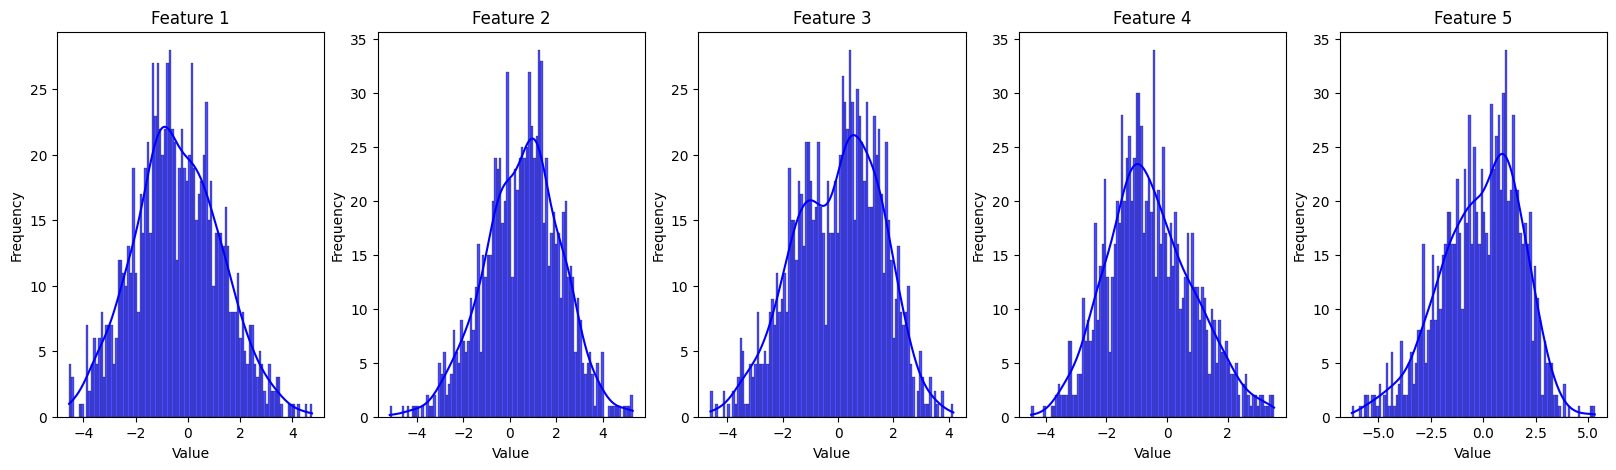

In [111]:
#create a subplot with 1 row and 5 columns
fig, axs = plt.subplots(1, 5, figsize=(20,5))

#plot the histograms of the first 5 features of the polluted dataframe

for i in range(df.shape[1]):
    #plot a row of histograms with the distribution of the features
    axs[i].set_title('Feature '+str(i+1))
    sns.histplot(df[i], bins=100,color='blue', kde = True, alpha=0.7, label='X', edgecolor='black', ax=axs[i])
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
plt.show()


In [112]:
df.describe()

,0,1,2,3,4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.412924,0.553137,-0.011211,-0.558847,-0.113063
std,1.645251,1.632377,1.561119,1.418718,1.900478
min,-4.547693,-5.177543,-4.606016,-4.486288,-6.269763
25%,-1.492642,-0.518644,-1.157154,-1.514788,-1.410745
50%,-0.502763,0.655087,0.166307,-0.688277,0.077678
75%,0.708740,1.615910,1.134561,0.343309,1.286961
max,4.750400,5.291507,4.161042,3.534872,5.326312


Training for DecisionTree...
Training for LogisticRegression...
Training for KNN...
Training for RandomForest...
Training for AdaBoost...
Training for MLP...


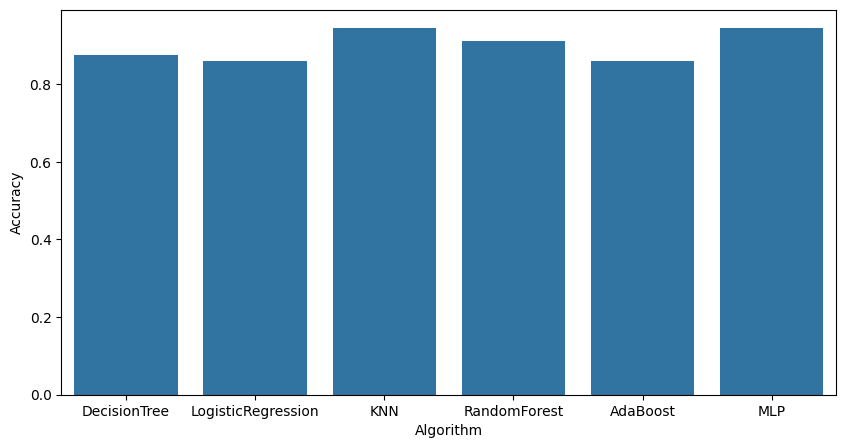

In [114]:
CLASSIFICATION_ALGORITHMS = ["DecisionTree","LogisticRegression","KNN","RandomForest","AdaBoost","MLP"]
results = []

for i in CLASSIFICATION_ALGORITHMS:
    basic_analysis = classification(X, y, i, seed=2023)
    results.append(basic_analysis)

#create a barplot with the accuracy of each algorithm
    
plt.figure(figsize=(10,5))
sns.barplot(x=CLASSIFICATION_ALGORITHMS, y=[i['mean_perf'] for i in results])
plt.ylabel('Accuracy')
plt.xlabel('Algorithm')
plt.show()

In [115]:
def pollute(data, percentage, mean, variance):
    np.random.seed(2023)
    n = int(percentage*data.shape[0])
    data_copy = data.copy()

    for i in range(data.shape[1]):
        idx = np.random.choice(data.shape[0], n, replace=False)
        data_copy[idx, i] = data[idx, i] + np.random.normal(mean, variance, n)
    return data_copy

In [116]:
polluted = []

polluted.append(pollute(X, 0.05, 0, 1))
polluted.append(pollute(X, 0.05, 2, 2))
polluted.append(pollute(X, 0.1, 1, 5))
polluted.append(pollute(X, 0.1, 2, 3))
polluted.append(pollute(X, 0.25, 0.5, 3))
polluted.append(pollute(X, 0.3, 1, 2))
polluted.append(pollute(X, 0.35, 1, 1))
polluted.append(pollute(X, 0.4, 3, 1))
polluted.append(pollute(X, 0.45, 2, 1))
polluted.append(pollute(X, 0.5, 0, 2))

In [119]:
polluted_df = pd.DataFrame(polluted[-2])
#print the first column of the polluted dataframe
polluted_df[0]

0     -3.044852
1      1.445783
2      2.404213
3      1.573431
4     -0.425036
         ...   
995    2.539311
996    2.356720
997    0.173973
998   -1.475855
999   -1.730336
Name: 0, Length: 1000, dtype: float64

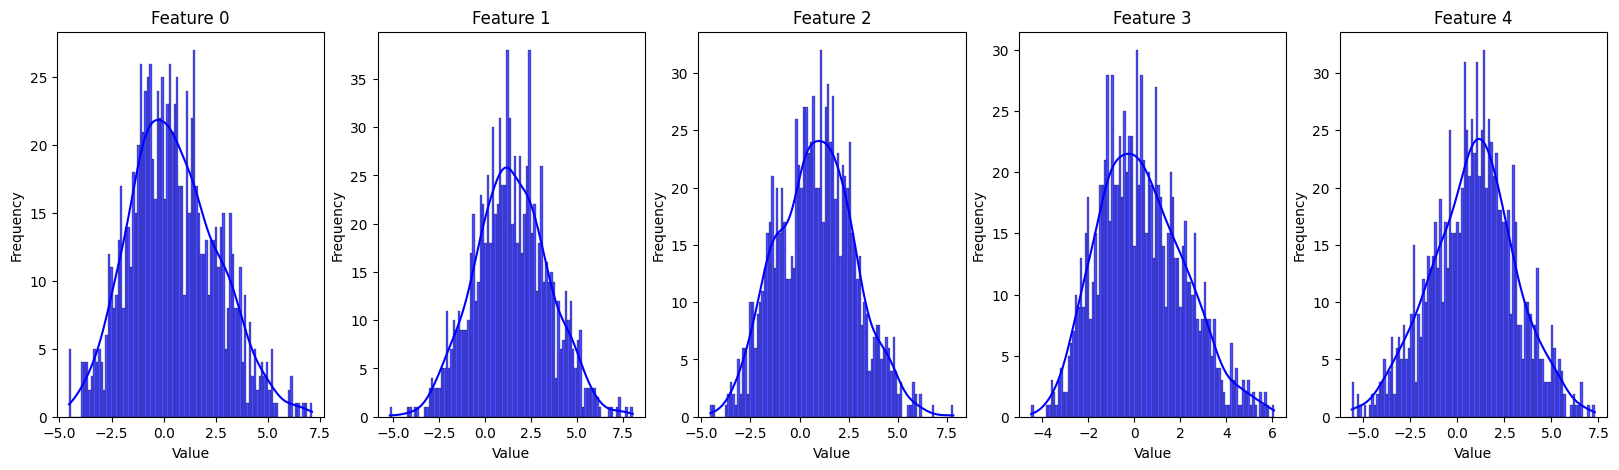

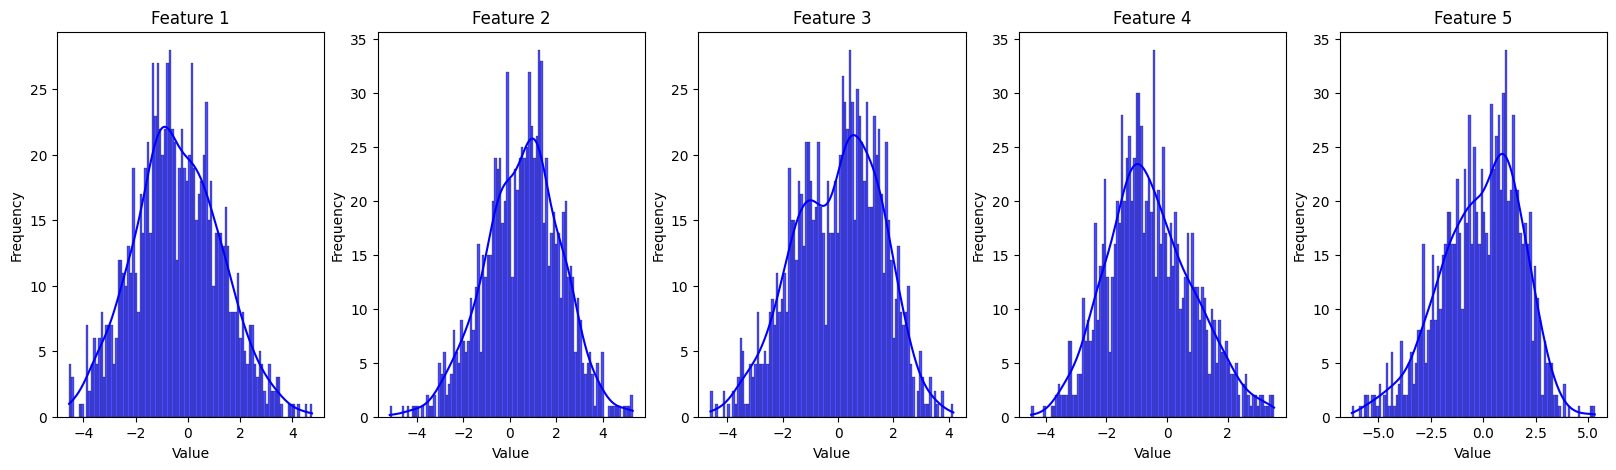

In [120]:
#create a subplot with 1 row and 5 columns
fig, axs = plt.subplots(1, 5, figsize=(20,5))

#plot the histograms of the first 5 features of the polluted dataframe

for i in range(polluted_df.shape[1]):
    #plot a row of histograms with the distribution of the features
    axs[i].set_title('Feature {}'.format(i+1))
    sns.histplot(polluted_df[i], bins=100,color='blue', kde = True, alpha=0.7, label='X', edgecolor='black', ax=axs[i])
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
plt.show()
    

#create a subplot with 1 row and 5 columns
fig, axs = plt.subplots(1, 5, figsize=(20,5))

#plot the histograms of the first 5 features of the polluted dataframe

for i in range(df.shape[1]):
    #plot a row of histograms with the distribution of the features
    axs[i].set_title('Feature '+str(i+1))
    sns.histplot(df[i], bins=100,color='blue', kde = True, alpha=0.7, label='X', edgecolor='black', ax=axs[i])
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
plt.show()


In [ ]:
results_for_each_algorithm = []
for algorithm in CLASSIFICATION_ALGORITHMS: # FIRST CICLE ON THE ALGORITHMS

    results_single_algorithm = []

    for i in range(0, 10): # SECOND CICLE ON THE NUMBER OF POLLUTED DATASET THAT YOU WANT TO CREATE WITH DIFFERENT % OF POLLUTION
        # DATA COLLECTION
        X, y = make_dataset_for_classification(n_samples=1000+i, n_features=5, n_informative=5, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, seed=2023)

        # DATA ANALYSIS
        results_1_analysis = classification(X, y, algorithm, SEED)
        results_single_algorithm.append(results_1_analysis)

    results_for_each_algorithm.append(results_single_algorithm)

# RESULTS EVALUATION
#EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS
plot(x_axis_values=[1000,1001,1002,1003,1004,1005,1006,1007,1008,1009], x_label="Number of samples", results=results_for_each_algorithm, title="1 Plot trial classification perf", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=[1000,1001,1002,1003,1004,1005,1006,1007,1008,1009], x_label="Number of samples", results=results_for_each_algorithm, title="2 Plot trial classification dist", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=[1000,1001,1002,1003,1004,1005,1006,1007,1008,1009], x_label="Number of samples", results=results_for_each_algorithm, title="3 Plot trial classification speed", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="speed")